In [118]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="whitegrid")

import ydata_profiling as yp
import os

import warnings
warnings.filterwarnings('ignore')

In [119]:
df = pd.read_csv('../data/data_feature_engineered.csv')
df.head()

,country,productgroup,category,style,gender,main_color,sec_color,has_extra_sizes,year,month,...,ratio,discount_pct,cost,sales,unit_profit,total_profit,profit_margin,promo1,promo2,label
0,Germany,SHOES,TRAINING,slim,women,chocolate,lavender,1,2016,3,...,0.663866,0.336134,13.29,28,-9.34,-261.52,-2.364557,0,0,0
1,Germany,SHORTS,TRAINING,regular,women,darkkhaki,lavender,1,2016,3,...,0.663866,0.336134,2.29,28,1.66,46.48,0.420253,0,0,0
2,Germany,HARDWARE ACCESSORIES,GOLF,regular,women,goldenrod,lavender,1,2016,3,...,0.663866,0.336134,1.70,28,2.25,63.00,0.569620,0,0,0
3,Germany,SHOES,RUNNING,regular,kids,rosybrown,lightblue,1,2016,3,...,0.663866,0.336134,9.00,28,-5.05,-141.40,-1.278481,0,0,0
4,Germany,SHOES,RELAX CASUAL,regular,women,blueviolet,lightblue,1,2016,3,...,0.663866,0.336134,9.60,28,-5.65,-158.20,-1.430380,0,0,0


In [120]:
if not os.path.exists('../reports/second_eda_report.html'):
    profile = yp.ProfileReport(df)
    profile.to_file('../reports/second_eda_report.html')

In [121]:
df.duplicated().sum() 

45

In [122]:
original_data = pd.read_csv('../data/full_gen_data.csv')
df_no_id = original_data.drop(columns=["article", "article.1", "customer_id"])
df_no_id.duplicated().sum()

45

> Duplicates are presented due to removing IDs

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99955 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          99955 non-null  object 
 1   productgroup     99955 non-null  object 
 2   category         99955 non-null  object 
 3   style            99955 non-null  object 
 4   gender           99955 non-null  object 
 5   main_color       99955 non-null  object 
 6   sec_color        99955 non-null  object 
 7   has_extra_sizes  99955 non-null  int64  
 8   year             99955 non-null  int64  
 9   month            99955 non-null  int64  
 10  week_number      99955 non-null  int64  
 11  regular_price    99955 non-null  float64
 12  current_price    99955 non-null  float64
 13  ratio            99955 non-null  float64
 14  discount_pct     99955 non-null  float64
 15  cost             99955 non-null  float64
 16  sales            99955 non-null  int64  
 17  unit_profit      

In [125]:
# Handling Data Types
for col in ['year', 'month', 'week_number', 'promo1', 'promo2', 'label', 'has_extra_sizes', 'country',
             'productgroup', 'category', 'style', 'gender', 'main_color', 'sec_color']:
    df[col] = df[col].astype('category')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99955 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   country          99955 non-null  category
 1   productgroup     99955 non-null  category
 2   category         99955 non-null  category
 3   style            99955 non-null  category
 4   gender           99955 non-null  category
 5   main_color       99955 non-null  category
 6   sec_color        99955 non-null  category
 7   has_extra_sizes  99955 non-null  category
 8   year             99955 non-null  category
 9   month            99955 non-null  category
 10  week_number      99955 non-null  category
 11  regular_price    99955 non-null  float64 
 12  current_price    99955 non-null  float64 
 13  ratio            99955 non-null  float64 
 14  discount_pct     99955 non-null  float64 
 15  cost             99955 non-null  float64 
 16  sales            99955 non-null  int64   
 17

# Numerical Variables

In [127]:
num_cols = df.select_dtypes(exclude='category').columns
num_cols

Index(['regular_price', 'current_price', 'ratio', 'discount_pct', 'cost',
       'sales', 'unit_profit', 'total_profit', 'profit_margin'],
      dtype='object')

In [128]:
df.describe()

,regular_price,current_price,ratio,discount_pct,cost,sales,unit_profit,total_profit,profit_margin
count,99955.000000,99955.000000,99955.000000,99955.000000,99955.000000,99955.000000,99955.000000,99955.000000,99955.000000
mean,52.406195,28.298277,0.545613,0.454387,6.517209,56.803041,21.781068,997.512050,0.526684
std,35.272212,22.580018,0.194353,0.194353,3.914767,87.948736,22.916923,2258.689734,0.700660
min,3.950000,1.950000,0.296482,0.000000,1.290000,1.000000,-11.340000,-9026.640000,-5.815385
25%,25.950000,11.950000,0.354839,0.300752,2.290000,10.000000,5.660000,73.400000,0.448468
50%,40.950000,20.950000,0.525021,0.474979,8.700000,26.000000,15.350000,316.750000,0.749652
75%,79.950000,37.950000,0.699248,0.645161,9.600000,64.000000,31.750000,998.480000,0.889328
max,197.950000,195.950000,1.000000,0.703518,13.290000,898.000000,194.660000,57743.060000,0.993417


In [129]:
def explore_num(df, num_col):
    fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 4]})

    # Boxplot on top
    sns.boxplot(x=df[num_col], ax=axes[0], color='lightblue')
    axes[0].set(xlabel='')

    # Histogram below
    sns.histplot(df[num_col], bins=30, kde=True, ax=axes[1], color='skyblue')
    axes[1].set_xlabel(num_col)

    plt.suptitle(f'{num_col} Distribution', fontsize=14)
    plt.tight_layout()
    plt.show()


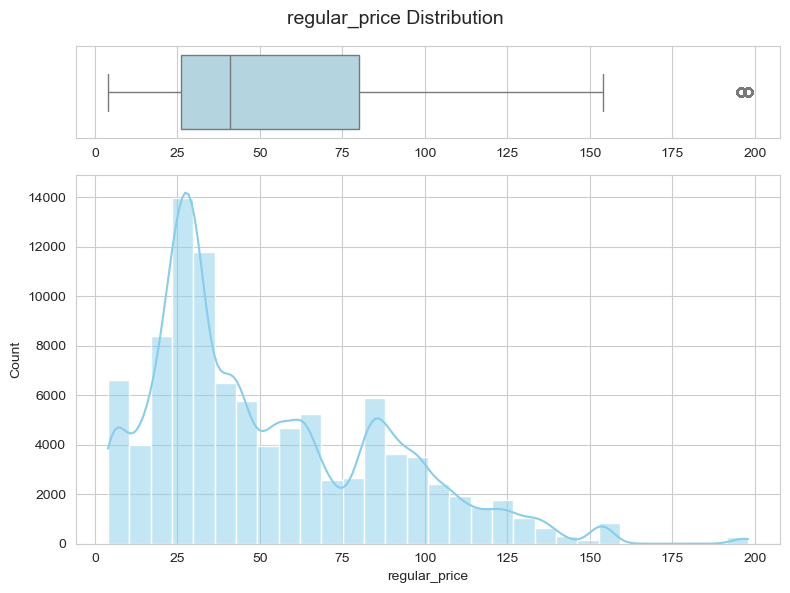

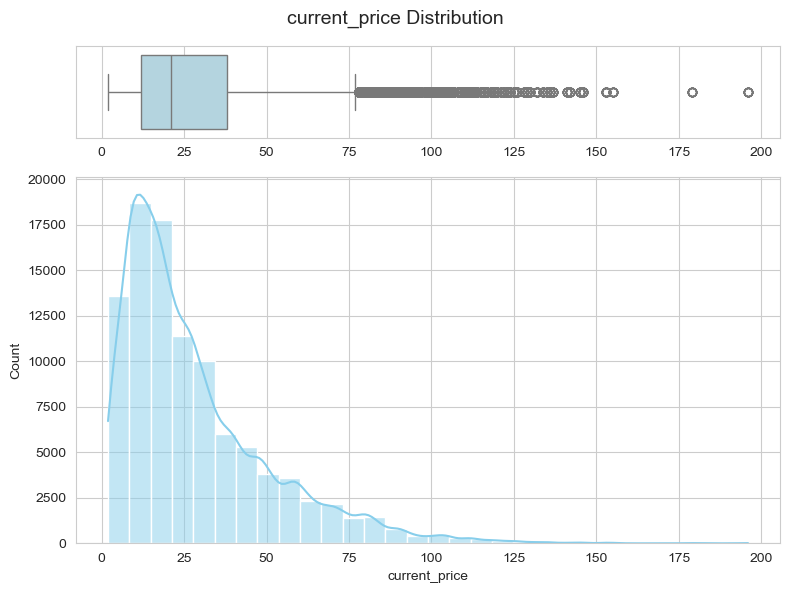

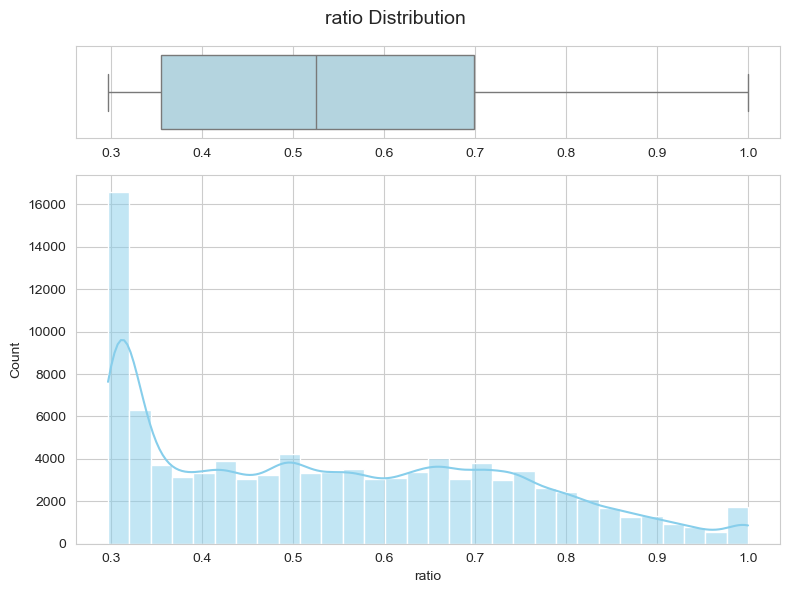

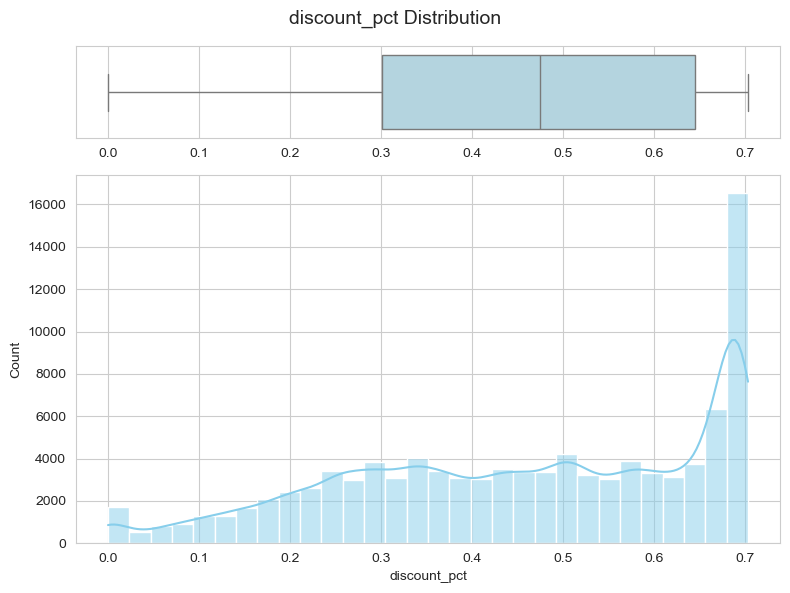

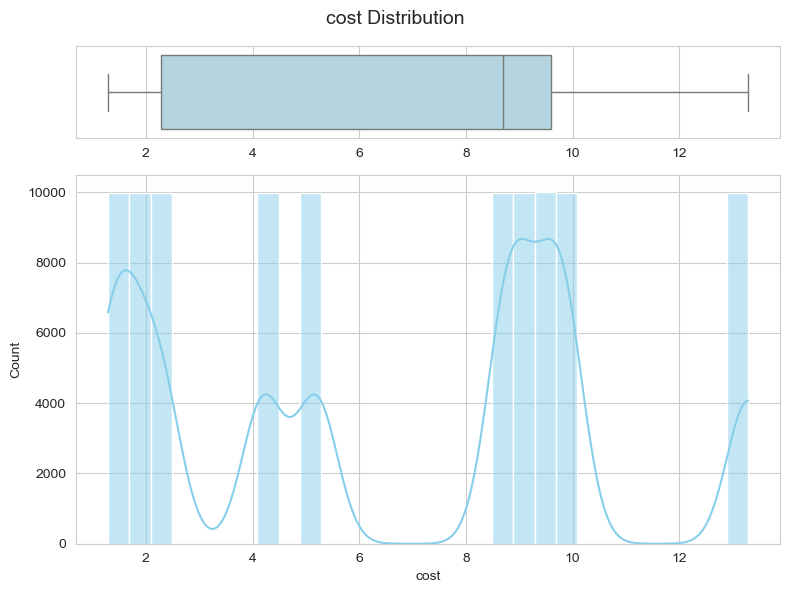

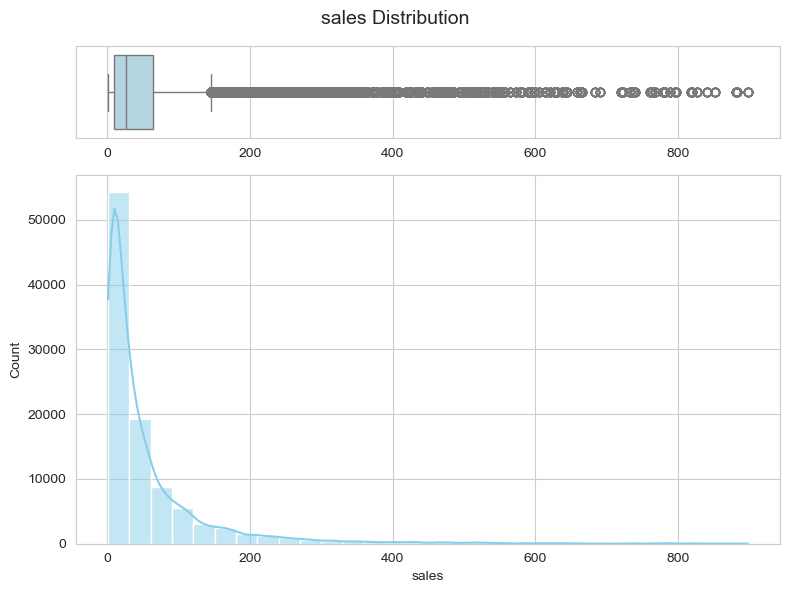

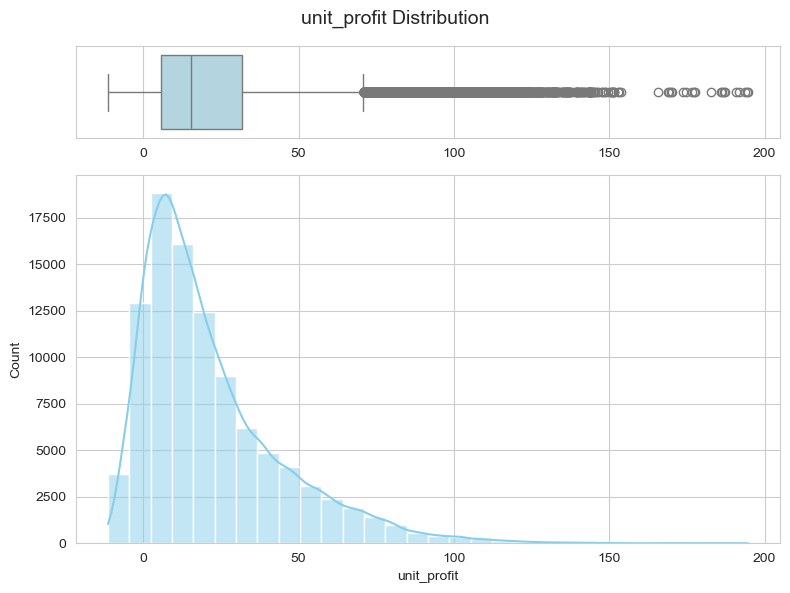

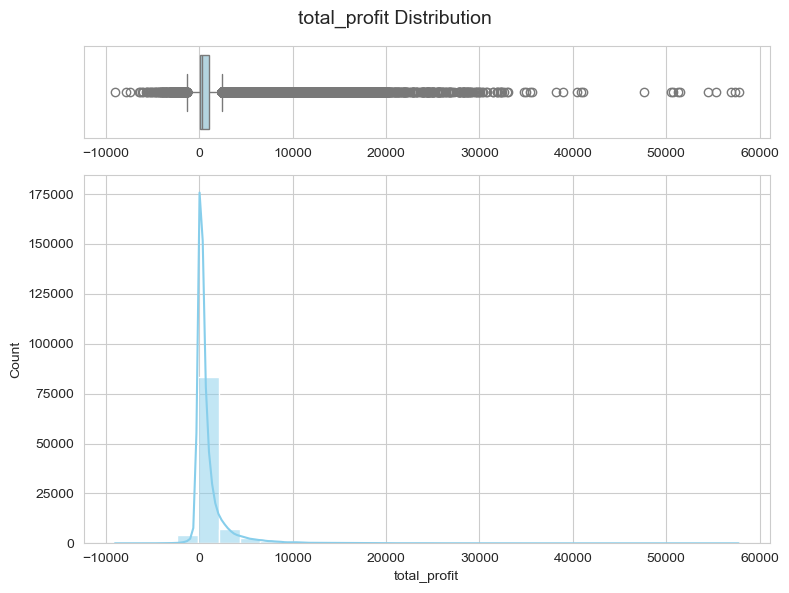

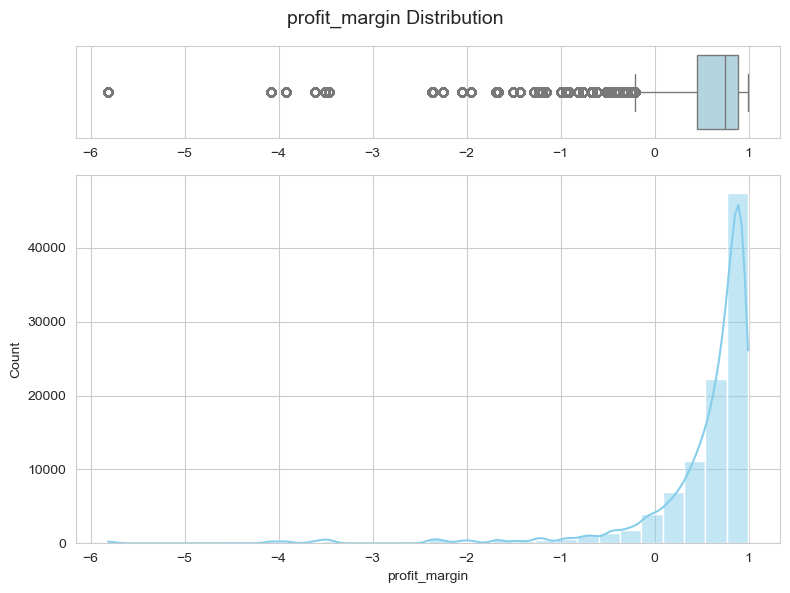

In [130]:
for col in num_cols:
    explore_num(df, col)

## Handling Outliers

In [131]:
def handle_outliers_col(df, num_col, p1=0.25, p2=0.75, capping = False):
    # Data Copy
    df_copy = df.copy()

    q1 = df_copy[num_col].quantile(p1)
    q3 = df_copy[num_col].quantile(p2)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    if capping:
        # Capping the outliers
        df_copy.loc[df_copy[num_col] > upper_bound, num_col] = upper_bound
        df_copy.loc[df_copy[num_col] < lower_bound, num_col] = lower_bound
    else:
        # Removing outliers
        df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]

    return df_copy

In [132]:
def handle_outliers_df(df, p1=0.25, p2=0.75):
    df_with_outliers_capping = df.copy()
    df_with_outliers_removing = df.copy()

    for col in num_cols:
        df_with_outliers_capping = handle_outliers_col(df_with_outliers_capping, col, capping=True, p1=p1, p2=p2)
        df_with_outliers_removing = handle_outliers_col(df_with_outliers_removing, col, capping=False, p1=p1, p2=p2)

    return df_with_outliers_capping, df_with_outliers_removing

In [133]:
def compare_plots(col, df, df_with_outliers_capping, df_with_outliers_removing):
    # Create a figure with three subplots (side by side)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

    # Create the first boxplot: With Outliers
    sns.boxplot(y=df[col], ax=axes[0], color='lightblue')
    axes[0].set_title('With Outliers')
    axes[0].set_ylabel('')

    # Create the second boxplot: With Outliers Capping
    sns.boxplot(y=df_with_outliers_capping[col], ax=axes[1], color='lightblue')
    axes[1].set_title('Winsorized')
    axes[1].set_ylabel('')

    # Create the third boxplot: With Outliers Removing
    sns.boxplot(y=df_with_outliers_removing[col], ax=axes[2], color='lightblue')
    axes[2].set_title('Outliers Removed')
    axes[2].set_ylabel('')

    # Set the main title of the entire figure
    fig.suptitle(f'Comparison for "{col}"', fontsize=14)

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Make room for the suptitle

    # Show the plot
    plt.show()


In [134]:
df_with_outliers_capping, df_with_outliers_removing = handle_outliers_df(df, p1=0.1, p2=0.90)

# Calculate the percentage of rows removed  
removed_pct = (df.shape[0] - df_with_outliers_removing.shape[0]) / df.shape[0] * 100
removed_pct

5.760592266519934

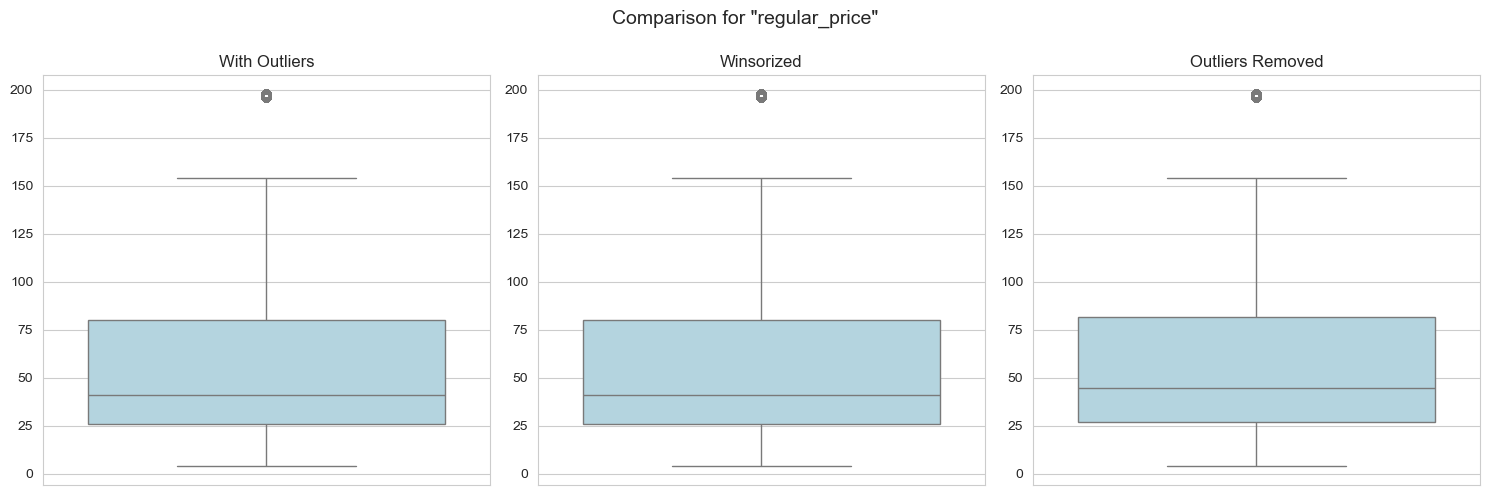

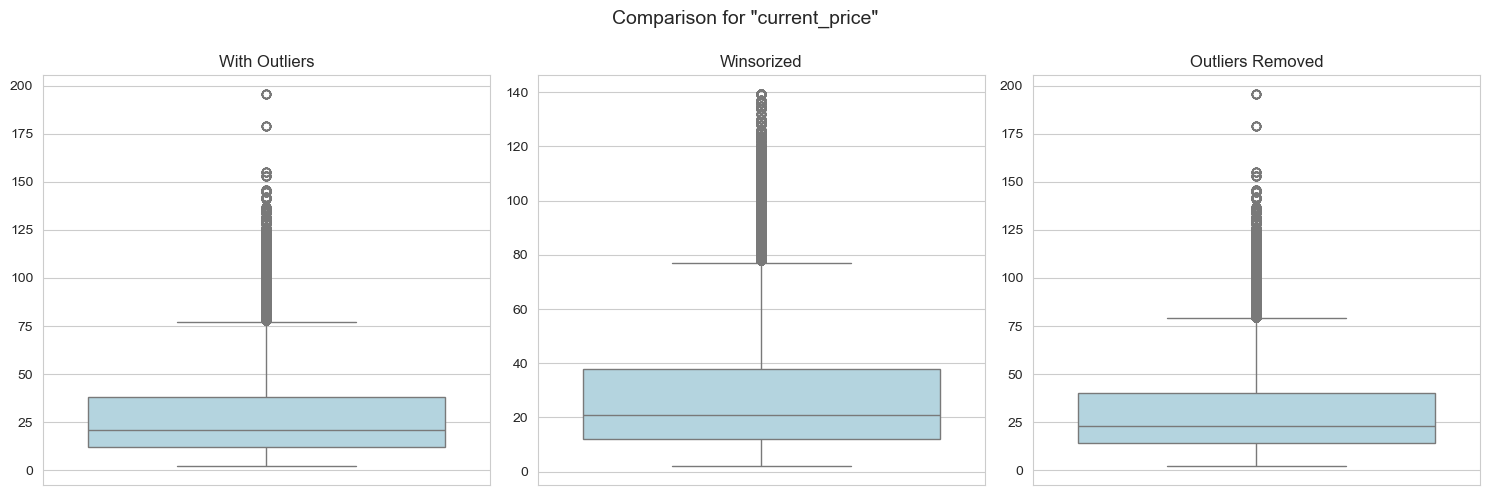

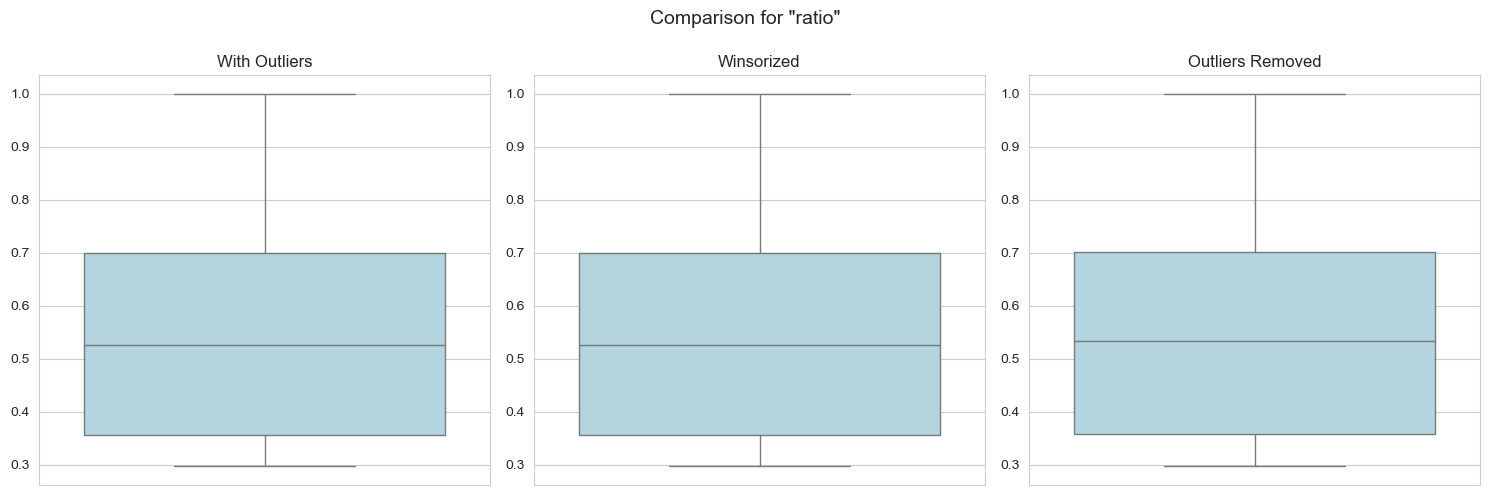

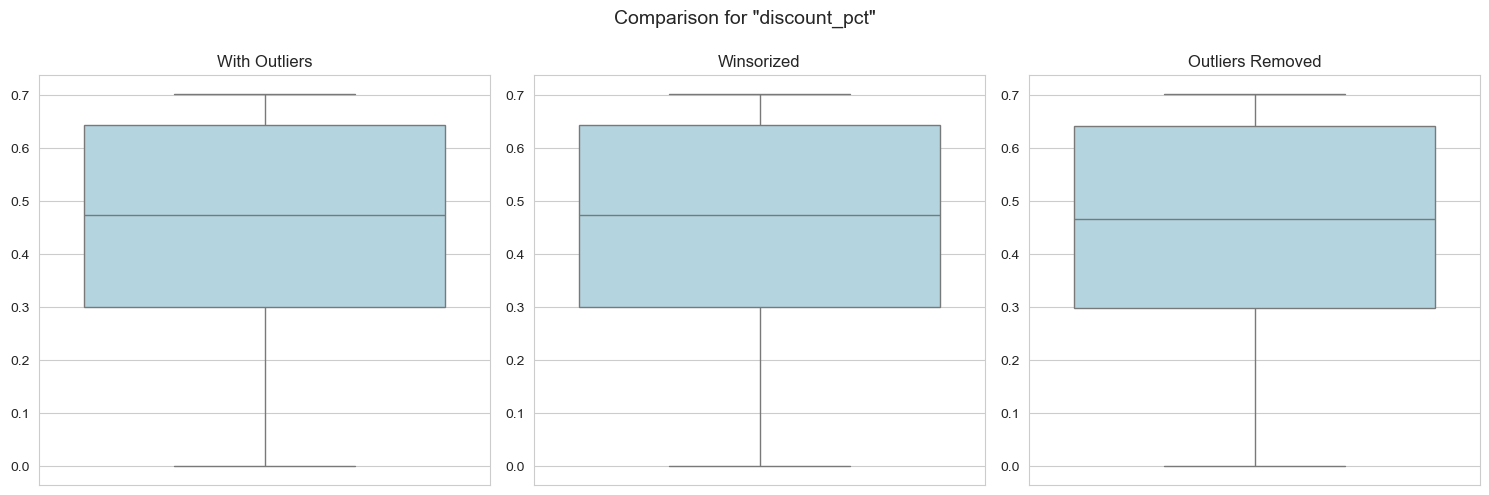

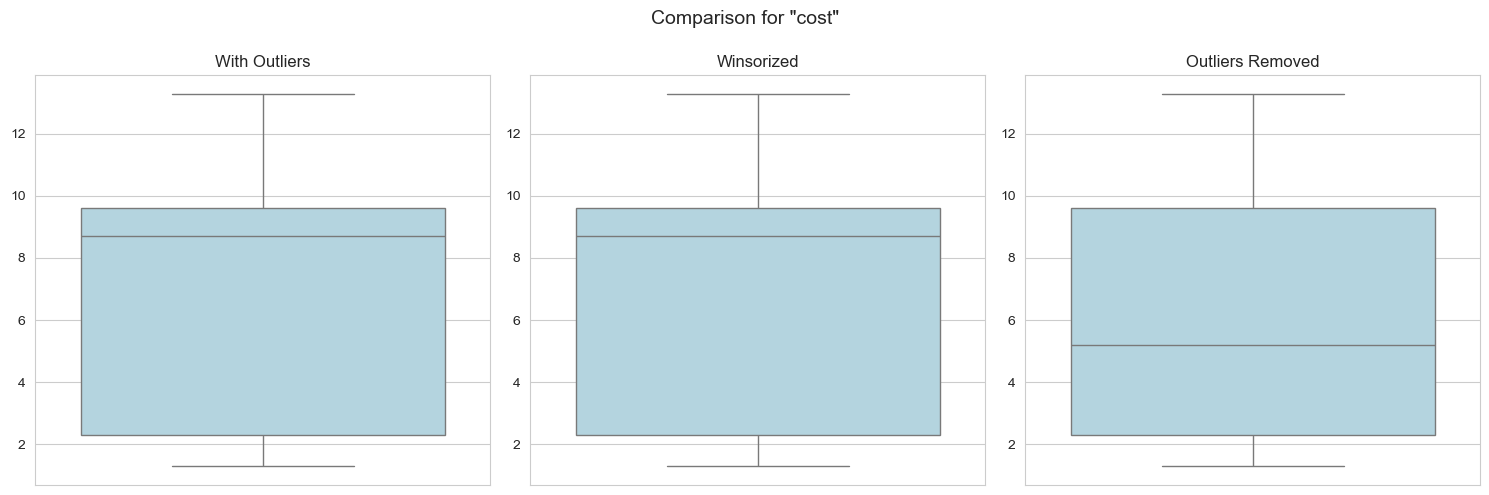

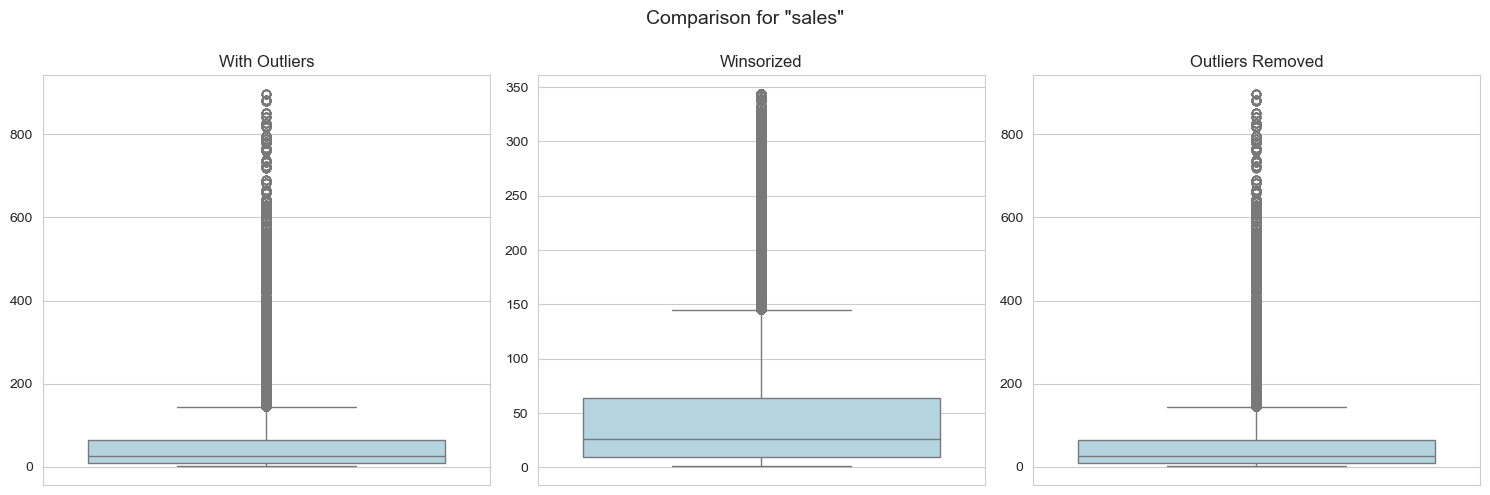

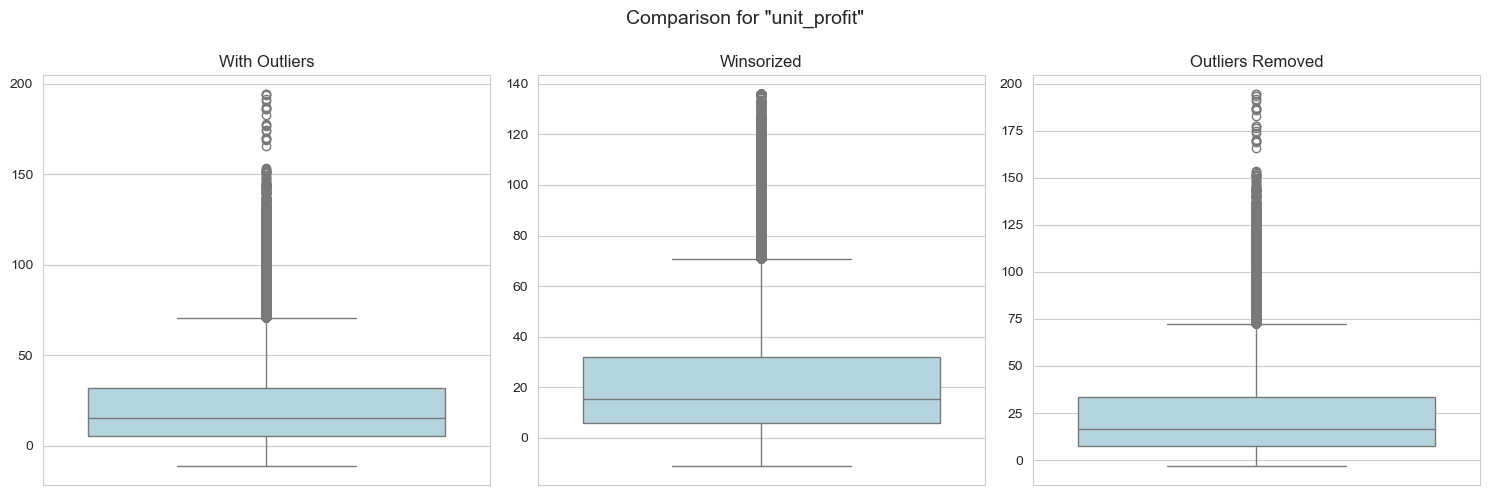

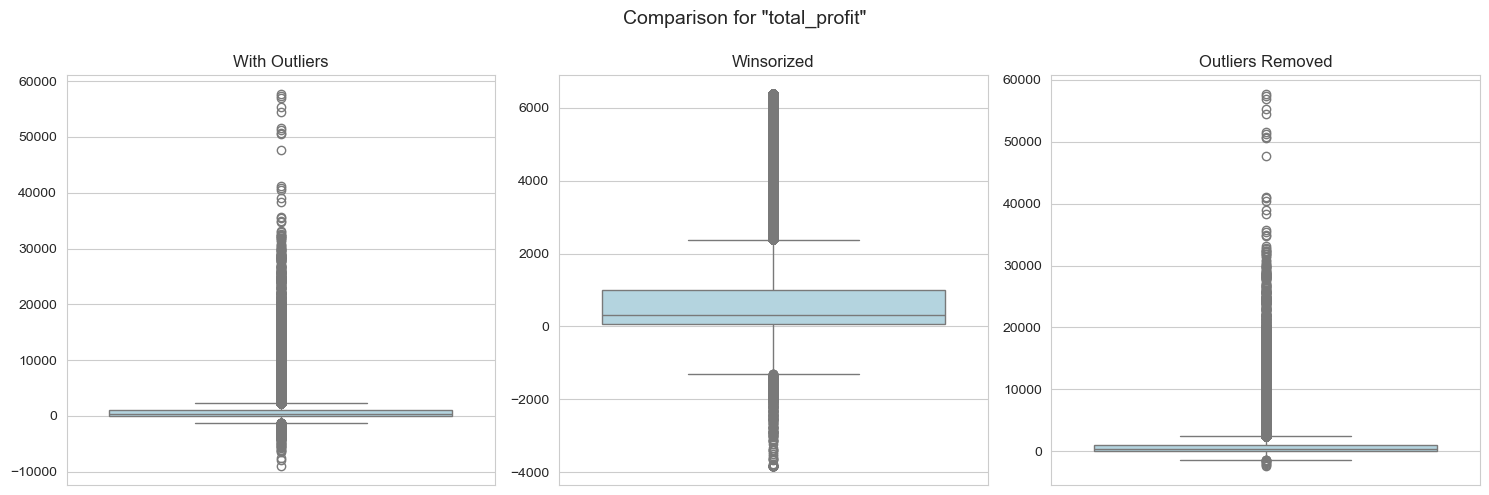

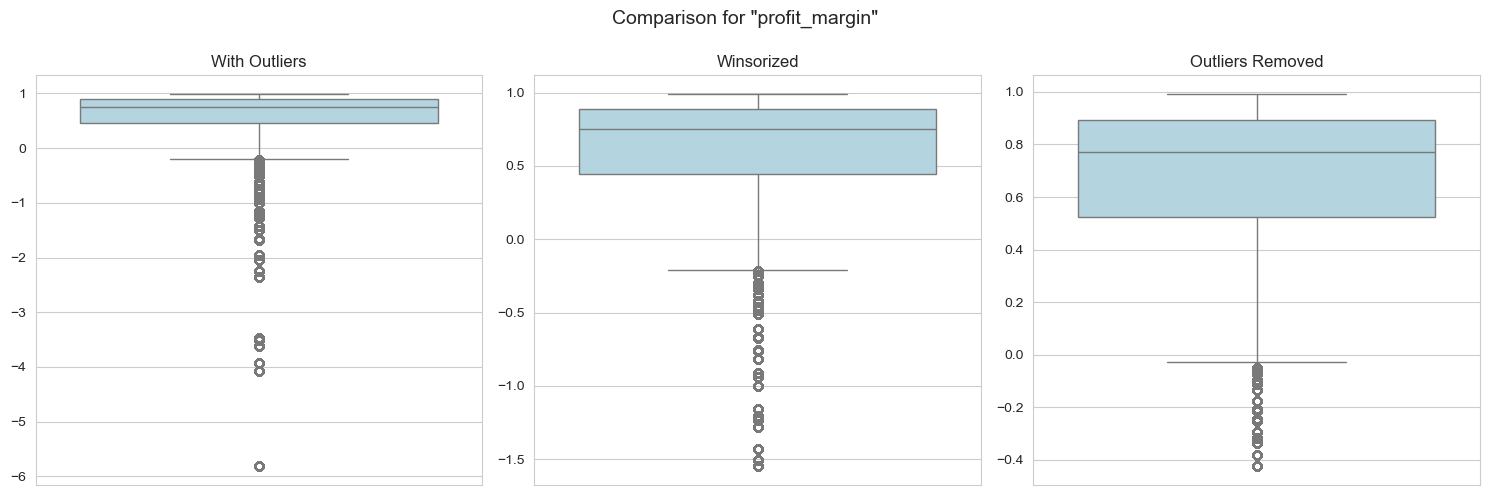

In [135]:
for col in num_cols:
    compare_plots(col, df, df_with_outliers_capping, df_with_outliers_removing)

> **Sales and Profit Features are more affected by outliers**

# Categorical Variables

In [136]:
cat_cols = df.select_dtypes(include='category').columns
cat_cols

Index(['country', 'productgroup', 'category', 'style', 'gender', 'main_color',
       'sec_color', 'has_extra_sizes', 'year', 'month', 'week_number',
       'promo1', 'promo2', 'label'],
      dtype='object')

In [137]:
df.describe(include='category')

,country,productgroup,category,style,gender,main_color,sec_color,has_extra_sizes,year,month,week_number,promo1,promo2,label
count,99955,99955,99955,99955,99955,99955,99955,99955,99955,99955,99955,99955,99955,99955
unique,3,4,6,3,4,10,3,2,4,12,53,2,2,2
top,Germany,SHOES,TRAINING,regular,women,blueviolet,rosybrown,1,2015,1,3,0,0,0
freq,49380,59975,29986,49979,69968,9998,39981,89959,42790,11730,2770,93770,99465,86031


In [138]:
def explore_cat_col (df, cat_col, ax):
    # Calculate the count of each category
    category_counts = df[cat_col].value_counts()

    # Create bar or pie chart based on the number of categories
    if len(category_counts) > 6:
        ax.bar(category_counts.index, category_counts.values)
        ax.set_xlabel(cat_col)
        ax.set_ylabel('Count')
        ax.set_title(f'Count of {cat_col}')
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
        ax.set_title(f'Percentage of {cat_col}')

def explore_cat_df(df, cat_cols):
    
    n = len(cat_cols)
    n_cols = 3
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        explore_cat_col(df, col, axes[i])

    # Remove extra axes if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


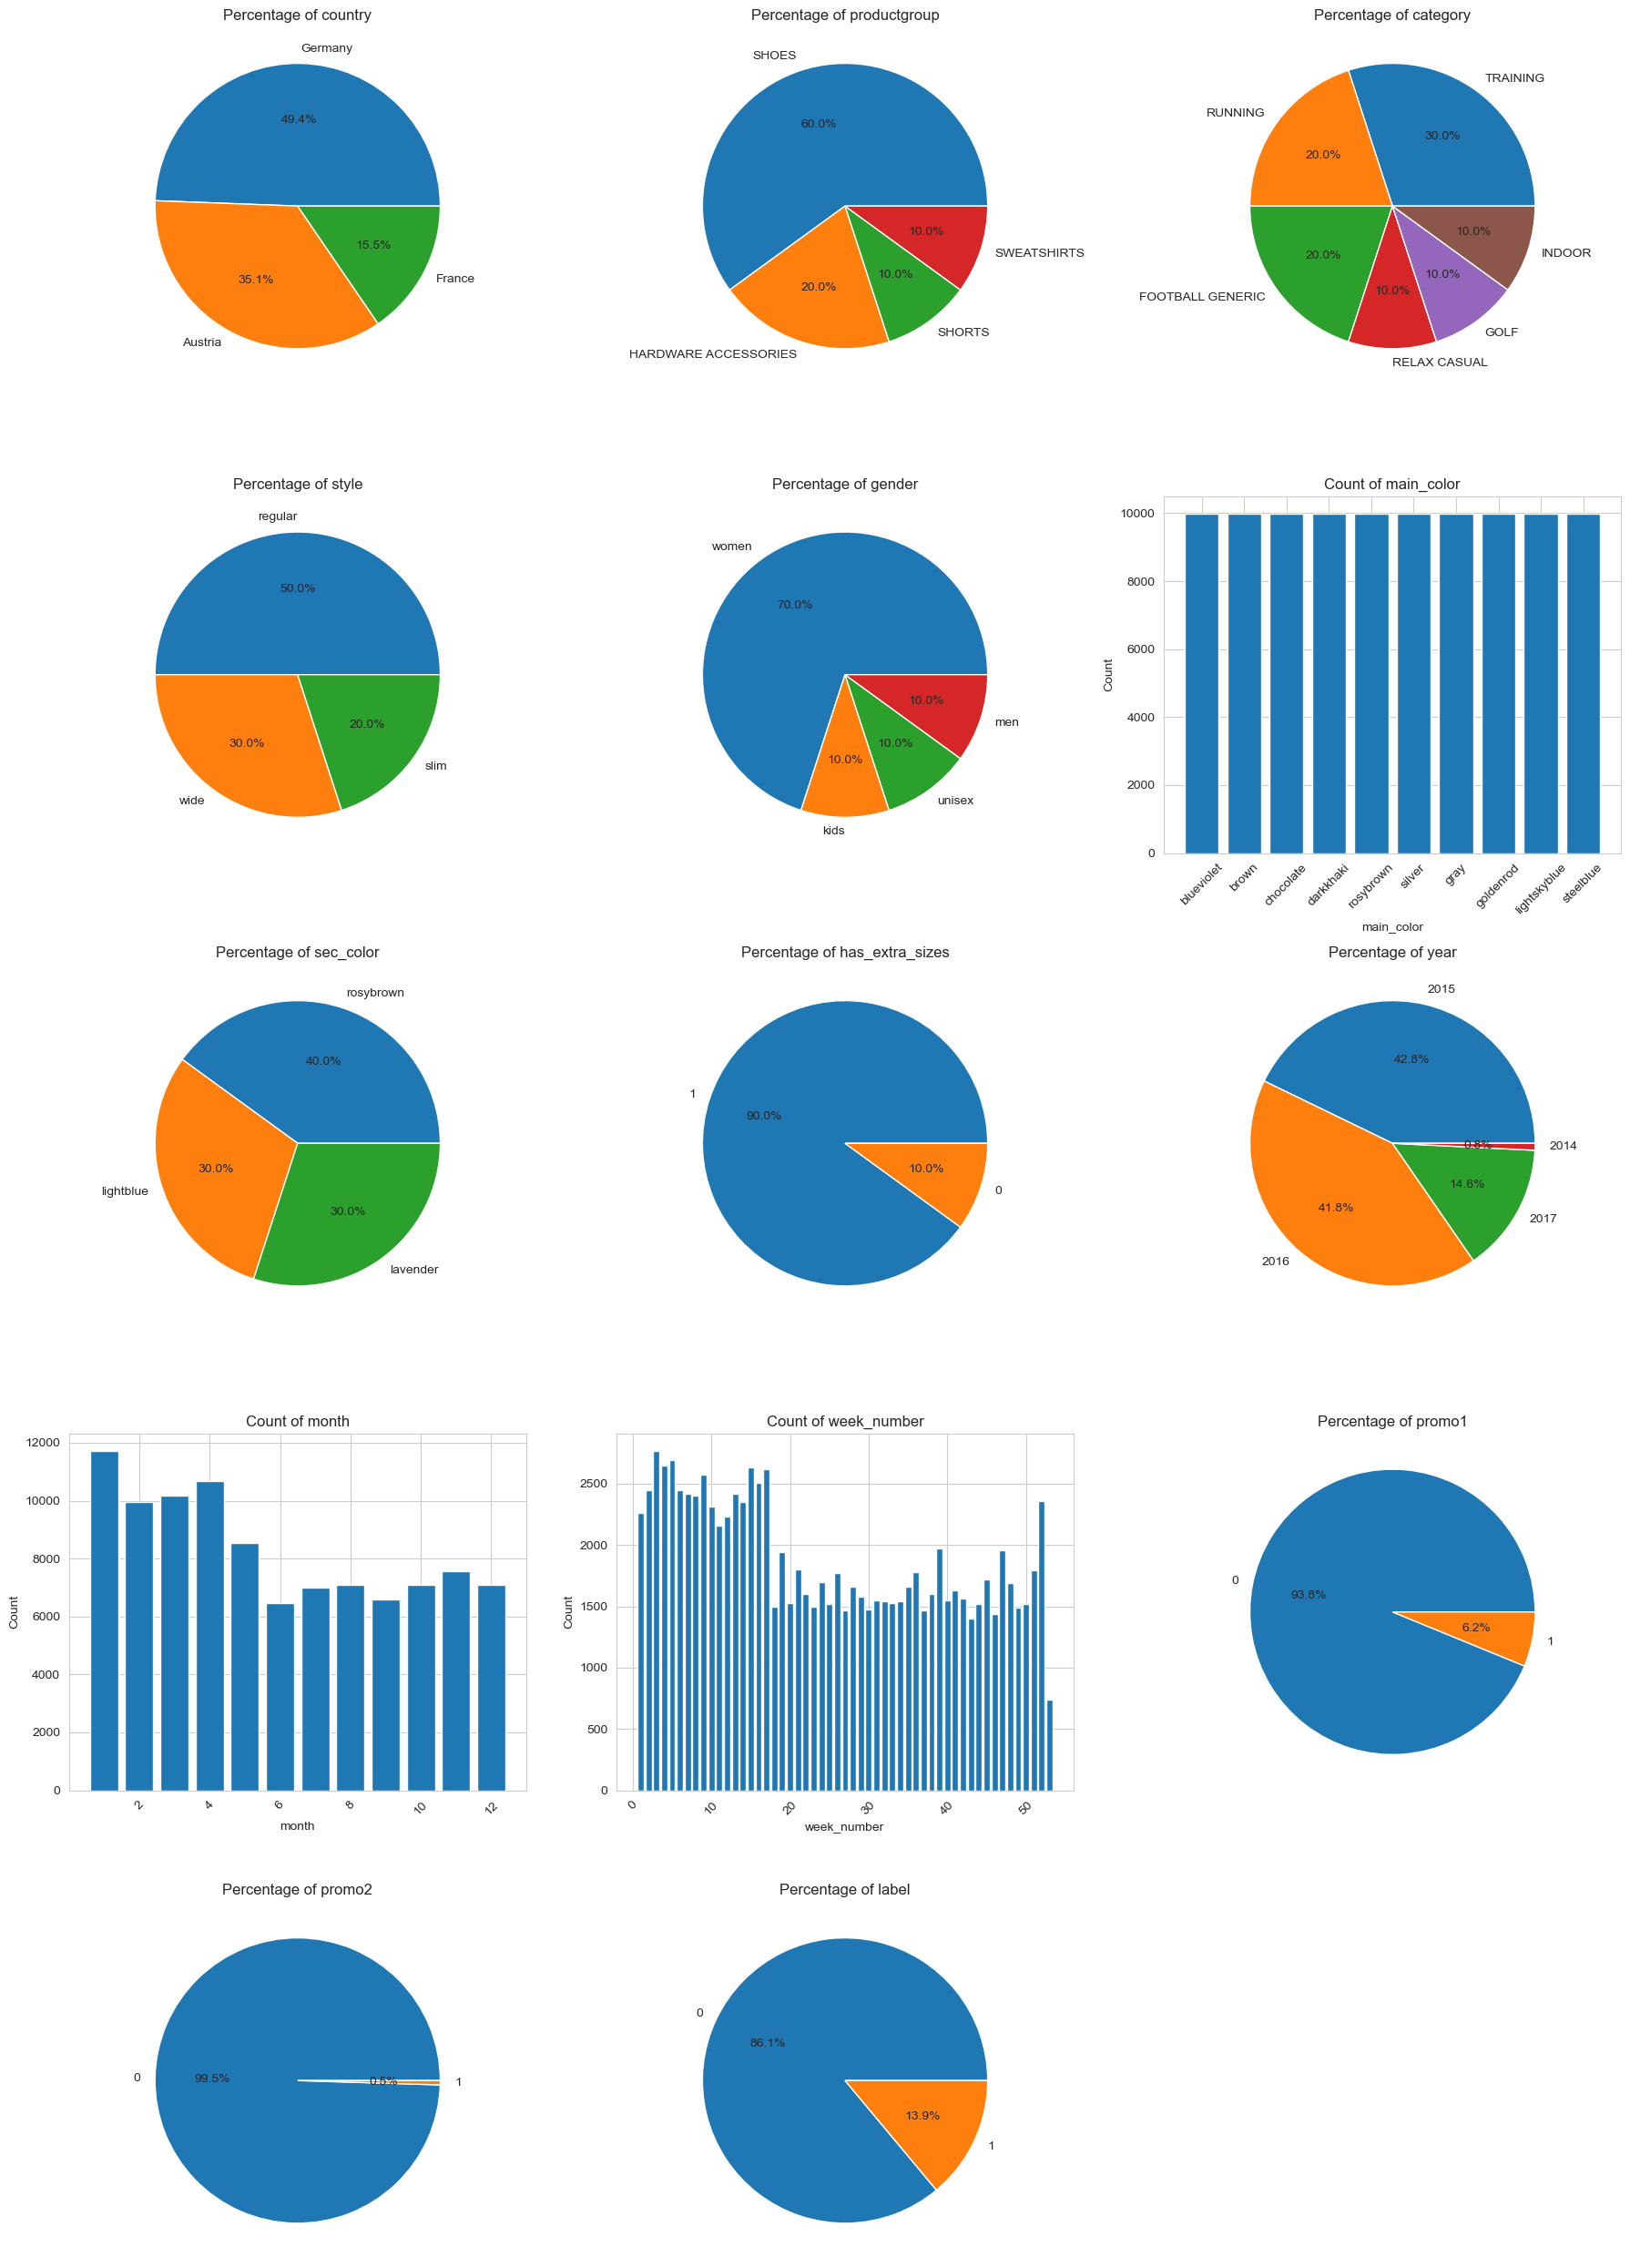

In [139]:
explore_cat_df(df, cat_cols)

* **Germany has the highest number of records (~50%)**
* **Shoes have the highest number of records (~60%)**
* **Women have the highest number of records (~70%)**
* **Promos are rare (<6%)**
* **Only about 14% of customers did buy products**

# Bivariate Analysis

In [140]:
df['label'] = df['label'].astype('int64')

In [141]:
print ("Correlations between numerical variables and 'label':")
for col in num_cols:
    print(f"\t>> {col}: {df[col].corr(df['label']) :.2f}")

Correlations between numerical variables and 'label':
	>> regular_price: -0.02
	>> current_price: 0.18
	>> ratio: 0.45
	>> discount_pct: -0.45
	>> cost: 0.00
	>> sales: -0.12
	>> unit_profit: 0.18
	>> total_profit: -0.01
	>> profit_margin: 0.08


In [142]:
for col in cat_cols:
    print(df.groupby(col)['label'].mean().nlargest(5))
    print('\n')

country
Austria    0.143581
Germany    0.138376
France     0.132535
Name: label, dtype: float64


productgroup
HARDWARE ACCESSORIES    0.140670
SHOES                   0.139608
SWEATSHIRTS             0.138983
SHORTS                  0.135054
Name: label, dtype: float64


category
RELAX CASUAL        0.146729
GOLF                0.141685
FOOTBALL GENERIC    0.140163
RUNNING             0.138605
TRAINING            0.137397
Name: label, dtype: float64


style
regular    0.139739
slim       0.138906
wide       0.138841
Name: label, dtype: float64


gender
unisex    0.142657
women     0.139307
men       0.137669
kids      0.137555
Name: label, dtype: float64


main_color
blueviolet    0.146729
brown         0.142657
goldenrod     0.141685
silver        0.139656
steelblue     0.138983
Name: label, dtype: float64


sec_color
lightblue    0.141090
rosybrown    0.138716
lavender     0.138298
Name: label, dtype: float64


has_extra_sizes
0    0.142657
1    0.138930
Name: label, dtype: float64


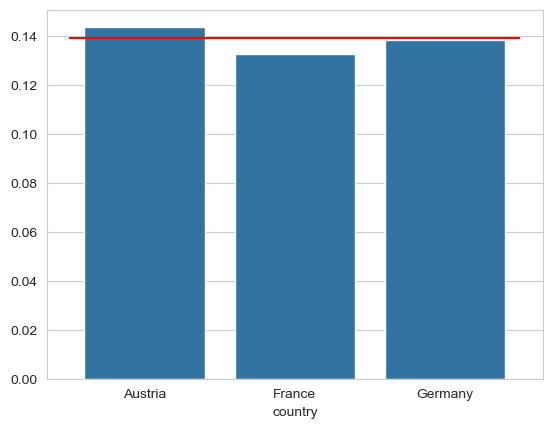

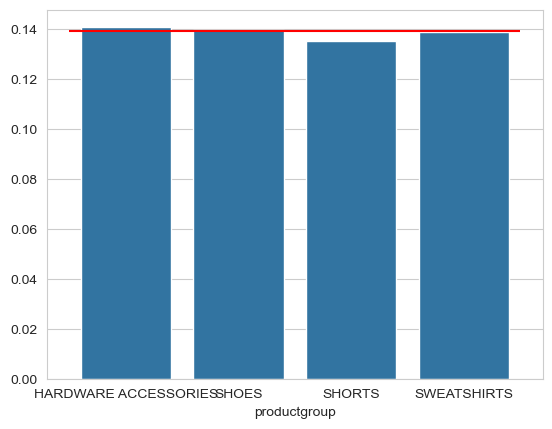

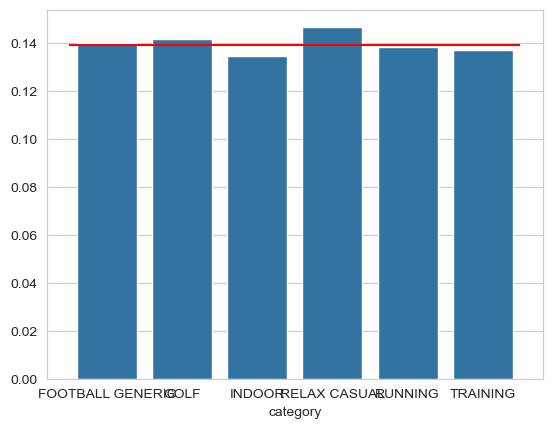

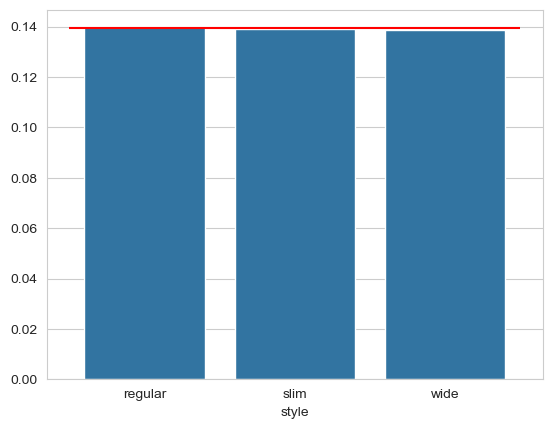

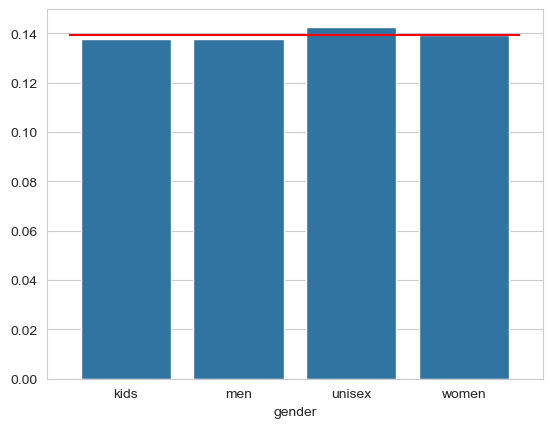

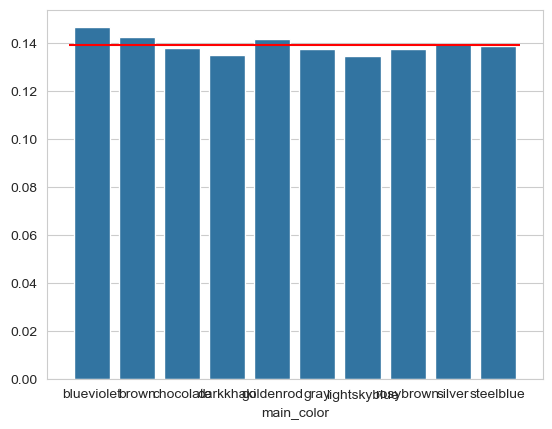

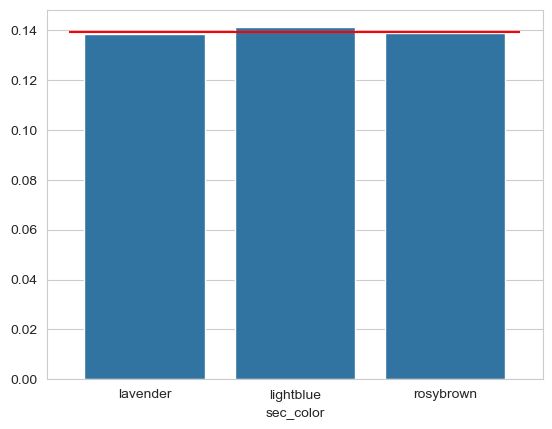

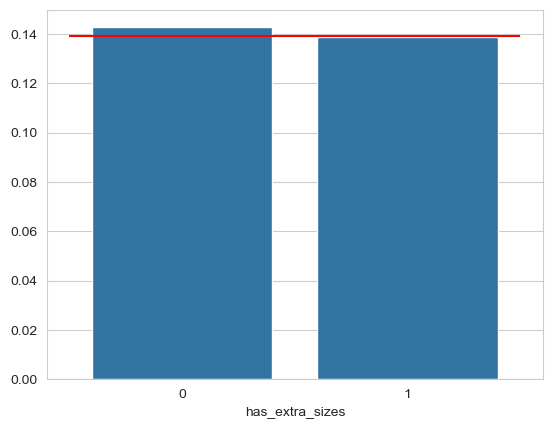

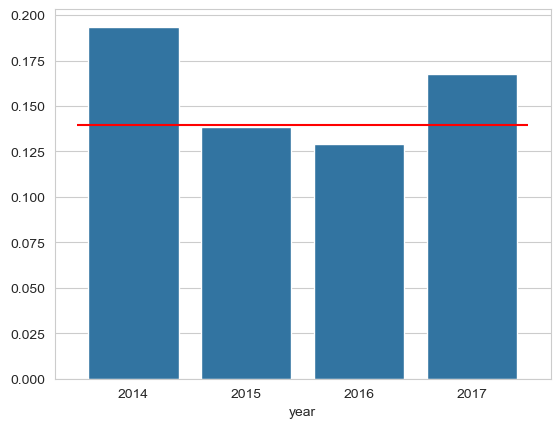

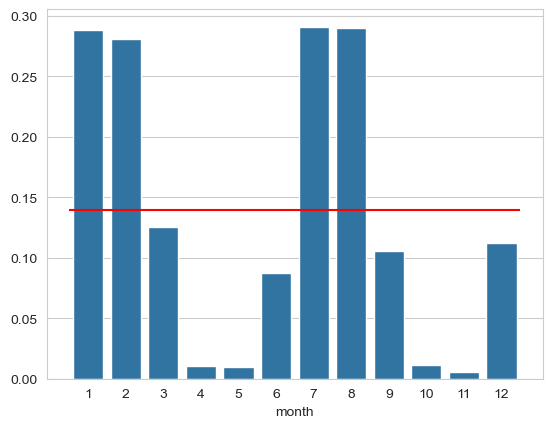

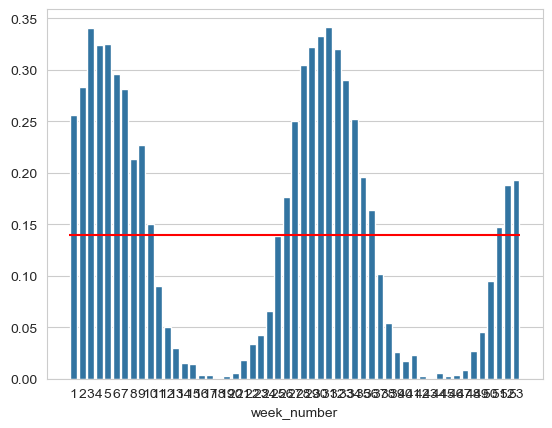

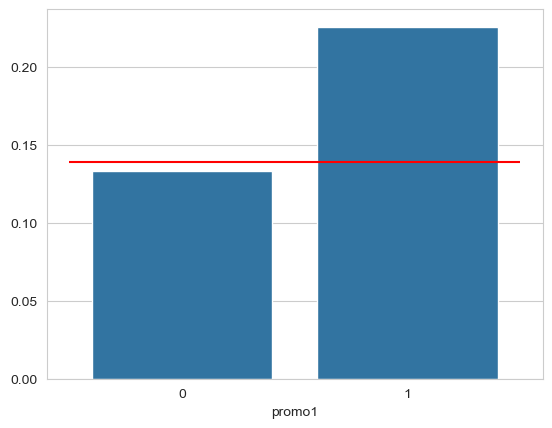

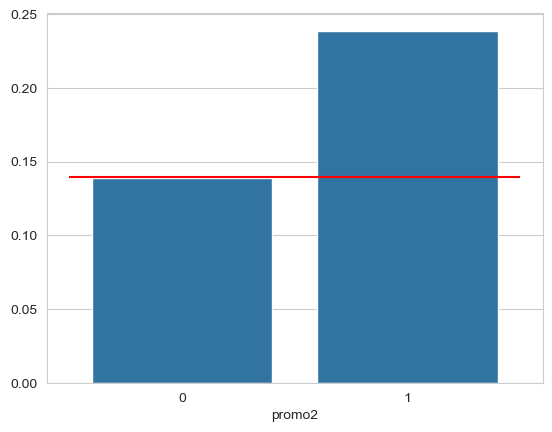

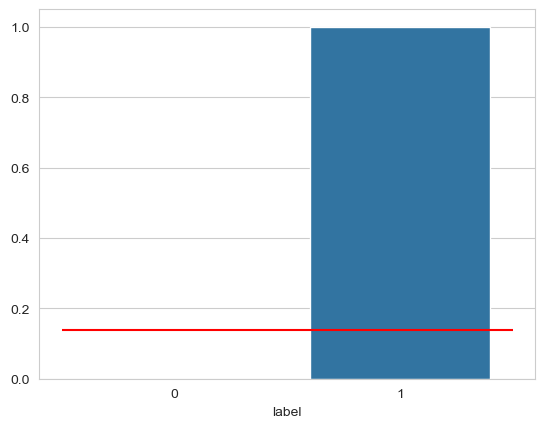

In [143]:
global_mean = df['label'].mean()
for col in cat_cols:
    groups = df.groupby(col)['label'].mean().sort_values(ascending=False)
    sns.barplot(x=groups.index, y=groups.values)
    plt.hlines(global_mean, xmin=-0.5, xmax=len(groups) - 0.5, color='red')
    plt.show()

* **Different Percentages of Conversion depending on :**
    * ***Time*** : year, month, week_number.
    * ***Events***: promo1, promo2

# Multivariate Analysis

In [144]:
pd.pivot_table(df, values='label', index='productgroup', columns='year', aggfunc='mean').round(3)

year,2014,2015,2016,2017
productgroup,,,,
HARDWARE ACCESSORIES,0.179,0.143,0.132,0.159
SHOES,0.184,0.139,0.128,0.173
SHORTS,0.231,0.132,0.129,0.156
SWEATSHIRTS,0.244,0.137,0.129,0.167


In [145]:
pd.pivot_table(df, values='label', index='category', columns='year', aggfunc='mean').round(3)

year,2014,2015,2016,2017
category,,,,
FOOTBALL GENERIC,0.167,0.138,0.129,0.178
GOLF,0.115,0.140,0.138,0.158
INDOOR,0.154,0.133,0.123,0.171
RELAX CASUAL,0.218,0.137,0.140,0.190
RUNNING,0.224,0.145,0.123,0.160
TRAINING,0.222,0.136,0.129,0.161


In [146]:
pd.pivot_table(df, values='label', index='category', columns='productgroup', aggfunc='mean').round(3)

productgroup,HARDWARE ACCESSORIES,SHOES,SHORTS,SWEATSHIRTS
category,,,,
FOOTBALL GENERIC,NaN,0.140,NaN,NaN
GOLF,0.142,NaN,NaN,NaN
INDOOR,NaN,0.135,NaN,NaN
RELAX CASUAL,NaN,0.147,NaN,NaN
RUNNING,0.140,0.138,NaN,NaN
TRAINING,NaN,0.138,0.135,0.139


In [147]:
pd.pivot_table(df, values='label', index='month', columns='year', aggfunc='mean').round(3)

year,2014,2015,2016,2017
month,,,,
1,NaN,0.288,0.292,0.285
2,NaN,0.307,0.267,0.268
3,NaN,0.151,0.104,0.114
4,NaN,0.017,0.006,0.010
5,NaN,0.011,0.008,NaN
6,NaN,0.089,0.086,NaN
7,NaN,0.288,0.293,NaN
8,NaN,0.300,0.274,NaN
9,NaN,0.106,0.105,NaN


* **2014 and 2017 are not represnted well in the data**

In [148]:
pd.pivot_table(df, values='label', index='promo1', columns='promo2', aggfunc='mean').round(3)

promo2,0,1
promo1,,
0,0.133,0.197
1,0.223,0.382


* **Highest conversion rate (~38%) when both promos are active**
* **Lowest conversion rate (~13%) when both promos are not active**

In [149]:
pd.pivot_table(df[df['label'] == 1], values='total_profit', index='productgroup', columns='year', aggfunc='mean').style.highlight_max(axis=1)

year,2014,2015,2016,2017
productgroup,,,,
HARDWARE ACCESSORIES,2885.344286,1148.340918,1073.818629,994.188531
SHOES,1742.582907,896.561706,849.739481,690.283336
SHORTS,3887.991111,1180.852078,944.362292,742.070526
SWEATSHIRTS,1556.013158,1110.898038,1061.145370,812.069672


In [150]:
pd.pivot_table(df[df['label'] == 1], values='total_profit', index='productgroup', columns='month', aggfunc='mean').style.highlight_max(axis=1)

month,1,2,3,4,5,6,7,8,9,10,11,12
productgroup,,,,,,,,,,,,
HARDWARE ACCESSORIES,987.392003,824.449162,1152.590040,721.915000,331.186000,1110.836087,1400.675205,1237.346461,987.224452,1183.352000,2489.907500,1622.105687
SHOES,713.167417,620.166311,1083.084426,514.821286,692.965000,862.250383,1018.063306,906.134323,713.320243,1046.095192,636.990690,1488.646567
SHORTS,909.365841,663.430902,1164.649421,684.992727,555.508889,1043.321111,1292.343491,1119.429167,1087.354783,354.200000,1831.060000,1929.533000
SWEATSHIRTS,762.211652,875.587413,752.487603,498.340909,904.000000,834.771552,1124.507576,1334.701493,1004.289855,3764.361111,1926.250000,2222.552941


In [151]:
df[df['label'] == 1].groupby('productgroup')['total_profit'].mean().sort_values(ascending=False)

productgroup
HARDWARE ACCESSORIES    1111.077226
SHORTS                  1048.070844
SWEATSHIRTS             1045.150468
SHOES                    849.968143
Name: total_profit, dtype: float64

In [152]:
df[df['label'] == 1].groupby('category')['total_profit'].mean().sort_values(ascending=False)

category
GOLF                1060.975636
RUNNING             1031.612003
INDOOR               983.992396
TRAINING             927.701262
FOOTBALL GENERIC     857.204372
RELAX CASUAL         815.518814
Name: total_profit, dtype: float64

In [153]:
df[df['label'] == 1].groupby('gender')['total_profit'].mean().nlargest(5)

gender
women     971.505716
kids      899.337600
unisex    894.806732
men       818.235647
Name: total_profit, dtype: float64

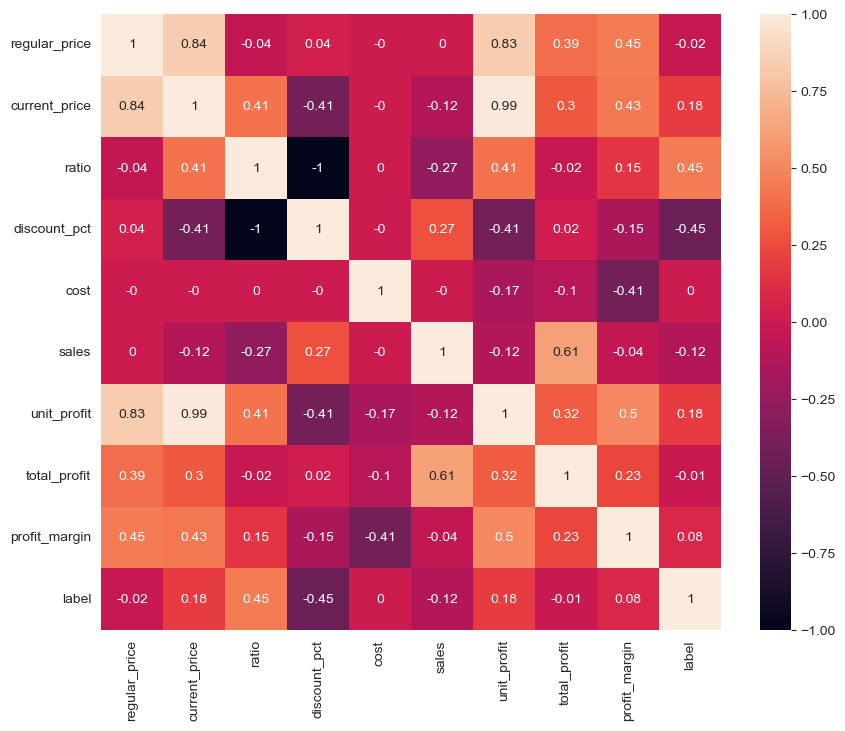

In [154]:
corr = df.corr(numeric_only=True).round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

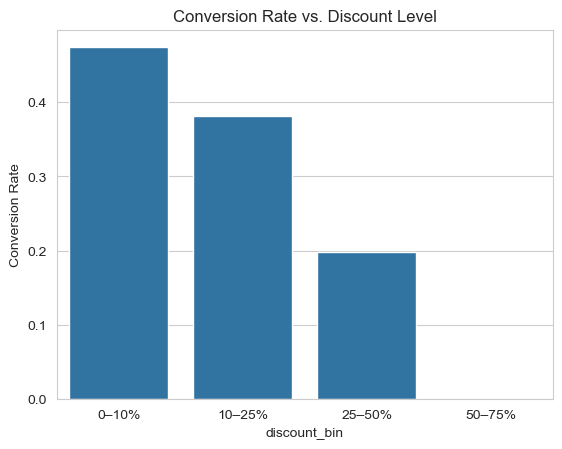

In [155]:
# Bin discount percentage into categories
df['discount_bin'] = pd.cut(df['discount_pct'], bins=[0, 0.1, 0.25, 0.5, 0.75], 
                            labels=['0–10%', '10–25%', '25–50%', '50–75%'])

# Plot conversion rate per bin
conversion_by_discount = df.groupby('discount_bin')['label'].mean().reset_index()

sns.barplot(data=conversion_by_discount, x='discount_bin', y='label')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate vs. Discount Level')
plt.show()

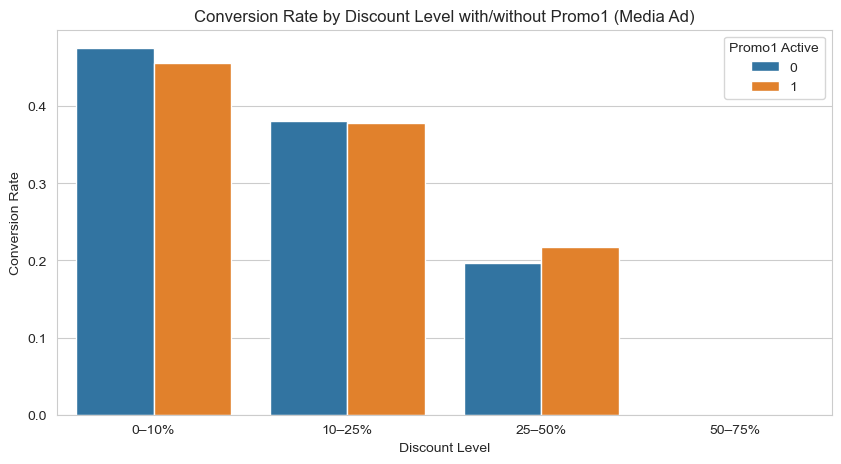

In [156]:
promo1_conversion = df.groupby(['discount_bin', 'promo1'])['label'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=promo1_conversion, x='discount_bin', y='label', hue='promo1')
plt.title('Conversion Rate by Discount Level with/without Promo1 (Media Ad)')
plt.ylabel('Conversion Rate')
plt.xlabel('Discount Level')
plt.legend(title='Promo1 Active')
plt.show()


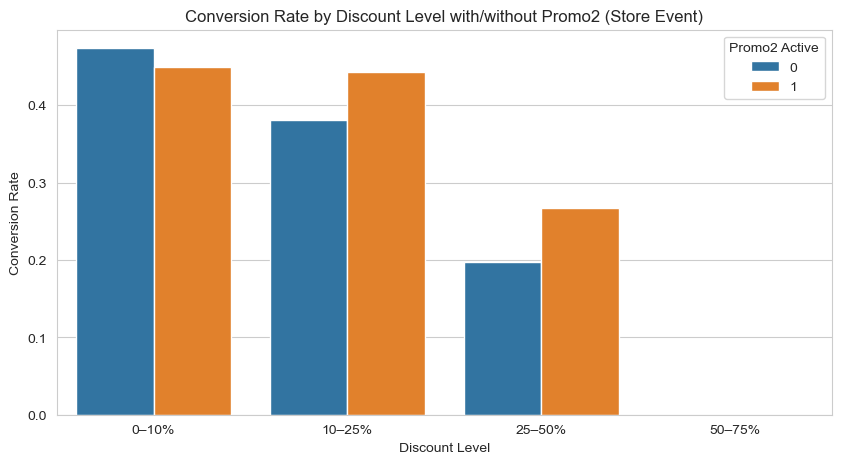

In [157]:
promo2_conversion = df.groupby(['discount_bin', 'promo2'])['label'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=promo2_conversion, x='discount_bin', y='label', hue='promo2')
plt.title('Conversion Rate by Discount Level with/without Promo2 (Store Event)')
plt.ylabel('Conversion Rate')
plt.xlabel('Discount Level')
plt.legend(title='Promo2 Active')
plt.show()


In [158]:
# Total Profit for the company
total_profit = df[df['label'] == 1]['total_profit'].sum()

# Total Spend
total_spend = (df['cost'] * df['sales']).sum()

# Total Profit Margin
total_profit_margin = total_profit / total_spend * 100

print(f'Total Spend: {total_spend:,.0f}')
print(f'Total Profit: {total_profit:,.0f}')
print(f'Total Profit Margin: {total_profit_margin:,.0f} %')

Total Spend: 37,002,159
Total Profit: 13,107,742
Total Profit Margin: 35 %


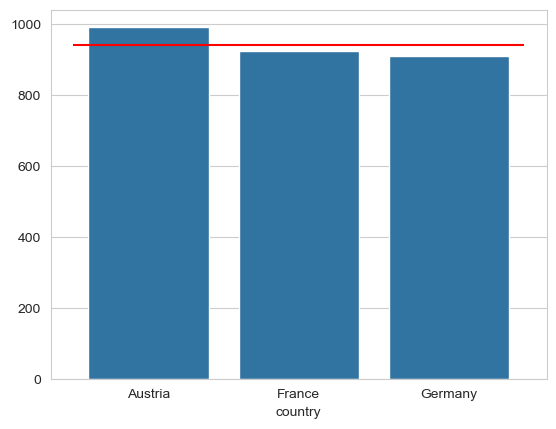

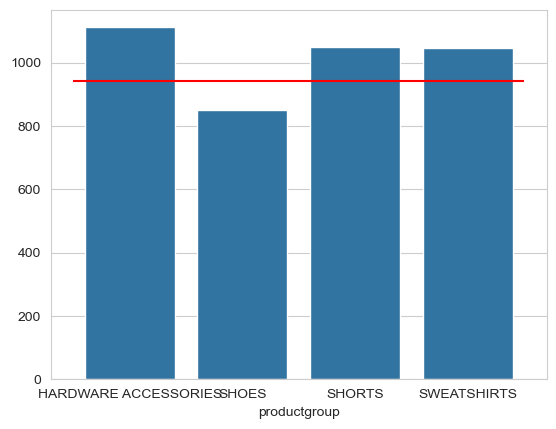

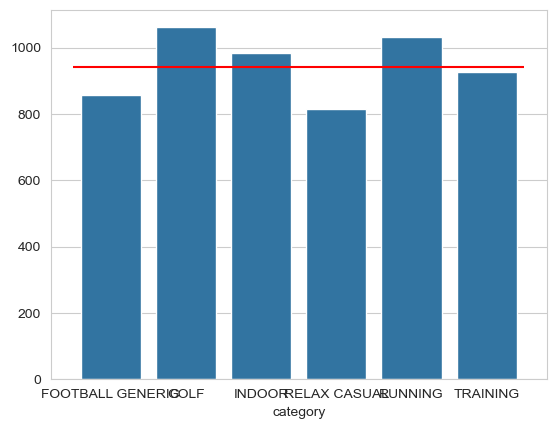

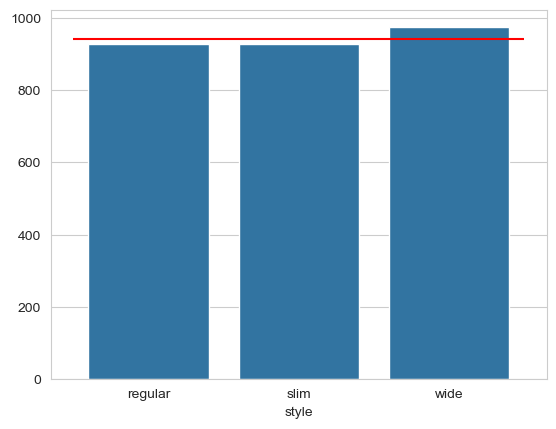

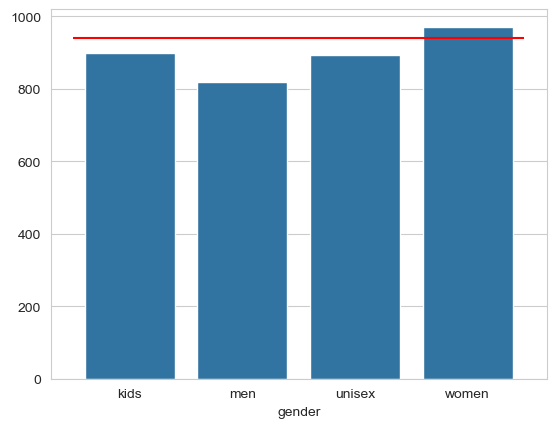

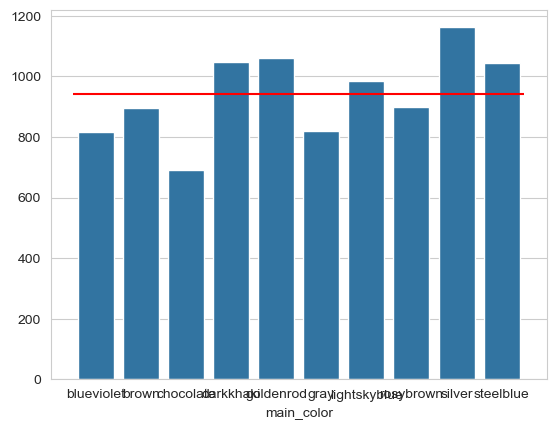

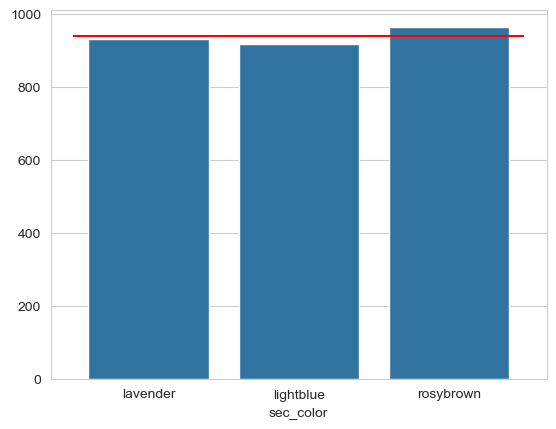

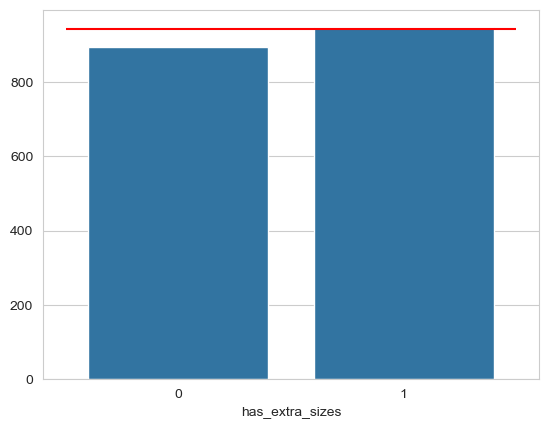

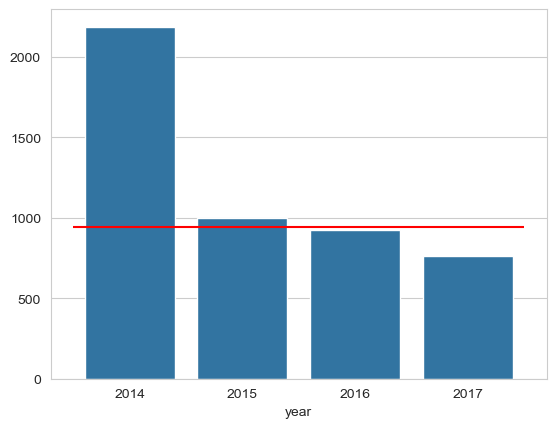

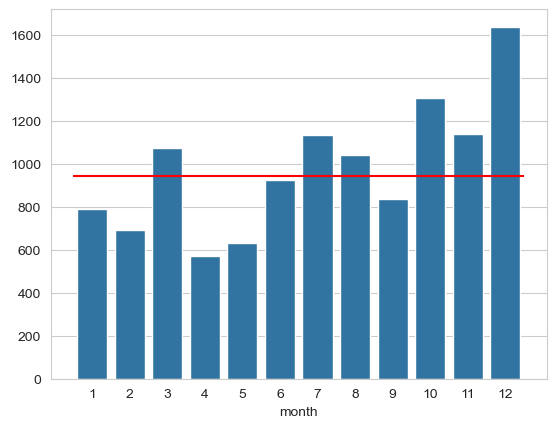

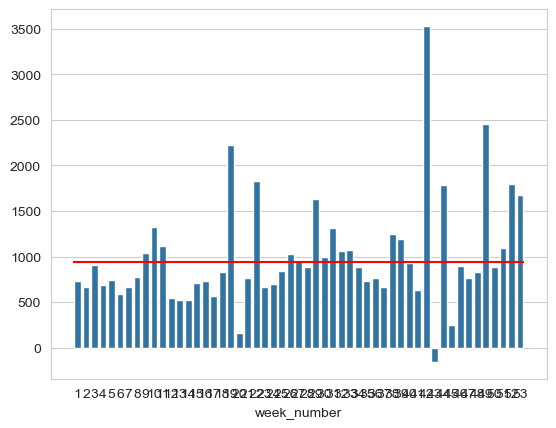

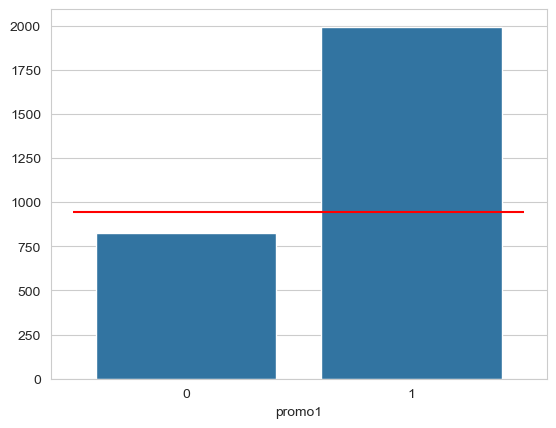

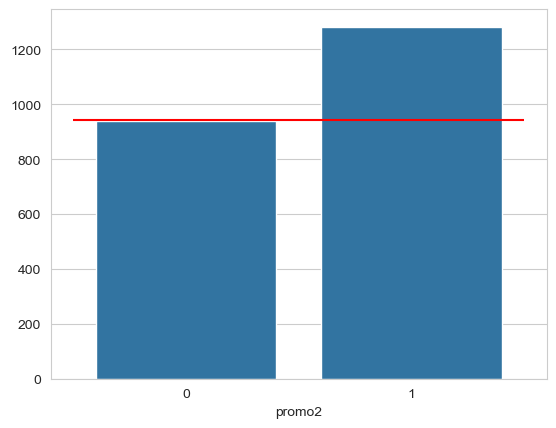

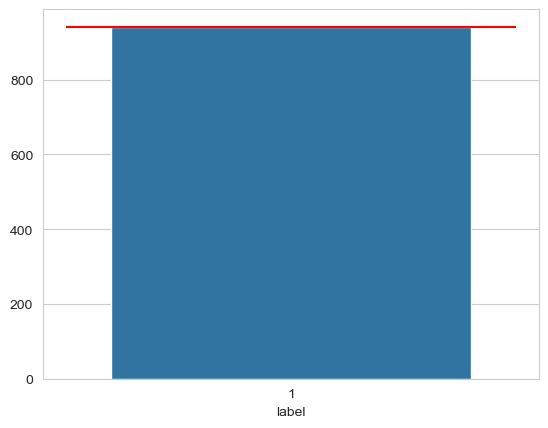

In [159]:
df_converted = df[df['label'] == 1]
global_mean = df_converted['total_profit'].mean()
for col in cat_cols:
    groups = df_converted.groupby(col)['total_profit'].mean().sort_values(ascending=False)
    sns.barplot(x=groups.index, y=groups.values)
    plt.hlines(global_mean, xmin=-0.5, xmax=len(groups) - 0.5, color='red')
    plt.show()

# Feature Selection

In [160]:
from scipy.stats import chi2_contingency

cat_cols_p_values={}
for col in cat_cols:
    contingency_table = pd.crosstab(df_with_outliers_capping[col], df_with_outliers_capping['label'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    cat_cols_p_values[col] = p_value

pd.Series(cat_cols_p_values).sort_values().round(3)



month              0.000
week_number        0.000
label              0.000
promo1             0.000
year               0.000
promo2             0.000
country            0.003
category           0.167
has_extra_sizes    0.315
main_color         0.371
sec_color          0.558
productgroup       0.599
gender             0.702
style              0.924
dtype: float64

In [161]:
important_cat_cols = [col for col, p_value in cat_cols_p_values.items() if p_value < 0.05]
important_cat_cols

['country', 'year', 'month', 'week_number', 'promo1', 'promo2', 'label']

In [162]:
to_drop_cat_cols = [col for col, p_value in cat_cols_p_values.items() if p_value > 0.2]
to_drop_cat_cols

['productgroup',
 'style',
 'gender',
 'main_color',
 'sec_color',
 'has_extra_sizes']

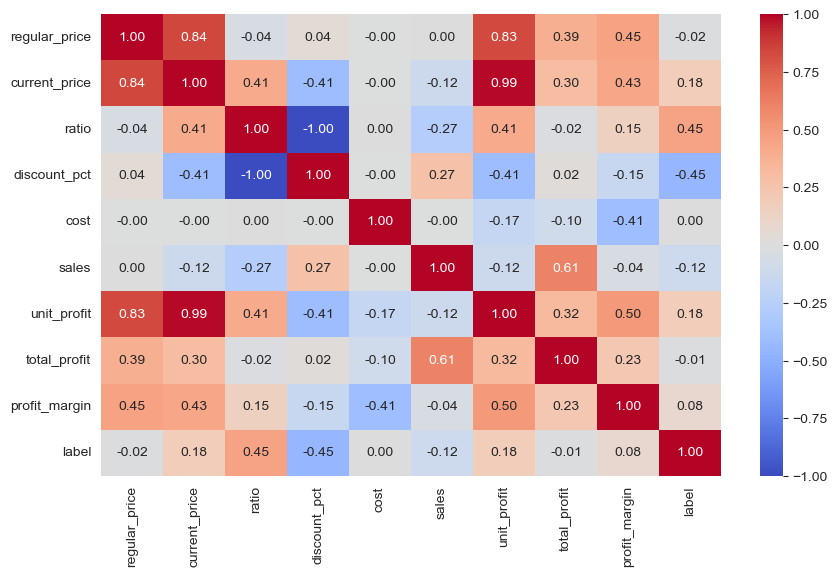

In [163]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

> `unit_profit`, `sales`, `total_profit`, `profit_margin`:	Post-event, leaks outcome

In [164]:
to_drop_num_cols = ['unit_profit', 'sales', 'total_profit', 'profit_margin', 'discount_pct', 'regular_price', 'cost']
to_drop = to_drop_cat_cols + to_drop_num_cols

In [165]:
# Using df_with_outliers_winsorized
df_outliers_cap_features_select= df_with_outliers_capping.drop(to_drop, axis=1)

In [166]:
df_outliers_cap_features_select.head()

,country,category,year,month,week_number,current_price,ratio,promo1,promo2,label
0,Germany,TRAINING,2016,3,12,3.95,0.663866,0,0,0
1,Germany,TRAINING,2016,3,12,3.95,0.663866,0,0,0
2,Germany,GOLF,2016,3,12,3.95,0.663866,0,0,0
3,Germany,RUNNING,2016,3,12,3.95,0.663866,0,0,0
4,Germany,RELAX CASUAL,2016,3,12,3.95,0.663866,0,0,0


In [167]:
# Save Data with Only Outliers Capping
df_with_outliers_capping.to_csv('../data/data_outliers_cap.csv', index=False)

# Save Data with Outliers Capping and Selected Features
df_outliers_cap_features_select.to_csv('../data/data_outliers_cap_features_select.csv', index=False)

In [ ]:
# profit per conversion
df_with_outliers_capping[df_with_outliers_capping['label'] == 1]['total_profit'].mean()

804.5826400459638

In [175]:
# cost per offer
df_with_outliers_capping['cost'].mean()

6.517208944024812